In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load the MNIST dataset
data = pd.read_csv('mnist_train.csv')

In [12]:
# Convert data to numpy array and shuffle
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

# Prepare development set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

# Prepare training set
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [13]:
Y_train

array([3, 5, 1, ..., 4, 4, 2], dtype=int64)

In [14]:
# Initialize parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Activation functions
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
# Forward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

# One-hot encoding
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

# Update parameters
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [15]:
# Get predictions and accuracy
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

# Gradient descent for training
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
# Train the model using gradient descent
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 0 0 ... 0 0 0] [3 5 1 ... 4 4 2]
0.07827118644067797
Iteration:  10
[8 9 1 ... 6 6 0] [3 5 1 ... 4 4 2]
0.1186271186440678
Iteration:  20
[8 9 6 ... 9 6 0] [3 5 1 ... 4 4 2]
0.1262542372881356
Iteration:  30
[8 9 6 ... 9 6 7] [3 5 1 ... 4 4 2]
0.1682542372881356
Iteration:  40
[3 9 6 ... 9 0 7] [3 5 1 ... 4 4 2]
0.22764406779661017
Iteration:  50
[3 8 1 ... 9 0 7] [3 5 1 ... 4 4 2]
0.28028813559322036
Iteration:  60
[3 8 1 ... 9 0 7] [3 5 1 ... 4 4 2]
0.3470169491525424
Iteration:  70
[3 8 1 ... 9 0 7] [3 5 1 ... 4 4 2]
0.4094237288135593
Iteration:  80
[3 3 1 ... 9 0 7] [3 5 1 ... 4 4 2]
0.466
Iteration:  90
[3 3 1 ... 9 0 7] [3 5 1 ... 4 4 2]
0.5074576271186441
Iteration:  100
[3 3 1 ... 9 0 2] [3 5 1 ... 4 4 2]
0.5429830508474577
Iteration:  110
[3 3 1 ... 4 0 2] [3 5 1 ... 4 4 2]
0.5724067796610169
Iteration:  120
[3 3 1 ... 4 0 2] [3 5 1 ... 4 4 2]
0.5999152542372881
Iteration:  130
[3 3 1 ... 4 0 2] [3 5 1 ... 4 4 2]
0.6212372881355932
Iteration:  140
[3 3 1 ... 

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

# Test a single prediction
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


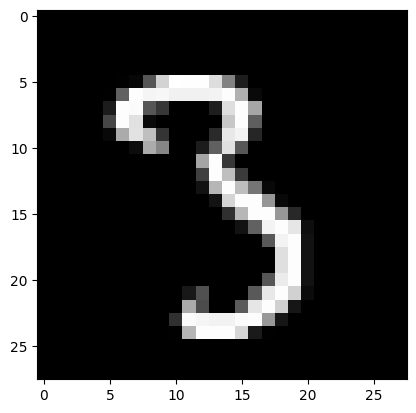

Prediction:  [3]
Label:  5


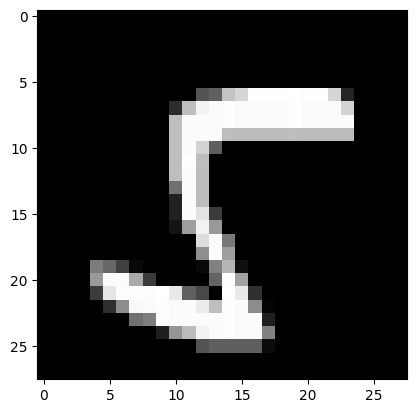

Prediction:  [1]
Label:  1


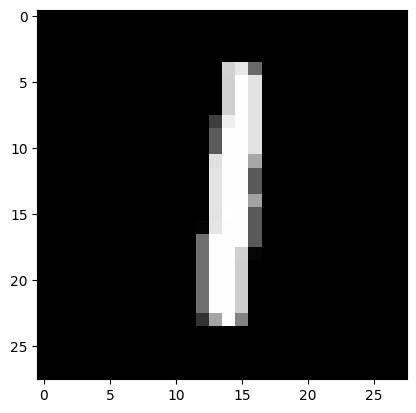

Prediction:  [8]
Label:  8


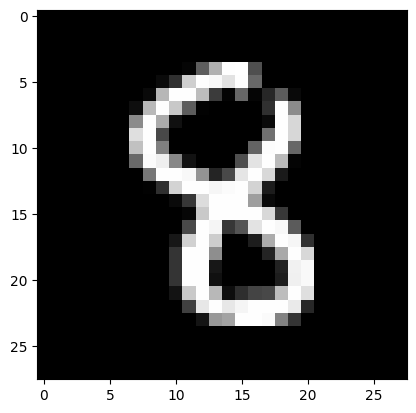

In [18]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [19]:
# Make predictions on the development set and get accuracy
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 0 9 7 2 4 9 0 1 8 1 0 9 1 2 2 5 1 0 6 0 1 3 8 5 2 9 0 7 1 0 2 3 7 7 7 5
 1 0 6 2 7 3 7 1 1 8 1 9 6 5 8 3 0 9 0 4 3 4 0 7 8 0 3 4 7 5 5 3 4 0 2 8 2
 3 0 6 4 4 4 5 8 4 5 1 0 2 5 9 7 1 0 8 9 1 7 9 9 7 9 8 8 0 9 4 9 9 4 2 0 0
 1 6 7 4 3 3 0 4 6 2 8 5 1 8 8 8 5 1 5 3 3 1 9 3 0 6 4 1 0 1 3 8 5 8 1 7 9
 5 1 9 1 9 3 8 1 5 8 9 8 6 7 1 4 5 7 6 4 6 4 4 6 8 5 1 0 0 8 8 2 2 3 6 0 5
 8 8 2 1 1 8 8 7 9 2 2 9 4 0 8 0 0 0 5 4 6 9 7 1 2 9 7 3 0 9 6 4 7 6 1 3 6
 7 1 7 9 1 8 5 8 8 0 2 6 1 1 3 8 8 9 8 2 2 2 0 0 8 1 7 1 1 6 7 6 0 4 1 5 3
 9 3 9 1 1 8 5 0 3 5 4 8 5 5 5 0 1 7 5 0 2 0 3 4 7 9 0 6 2 7 0 4 5 2 1 0 2
 0 4 8 4 3 1 8 1 9 2 5 8 1 8 3 0 3 2 6 1 4 0 6 7 4 8 1 7 2 4 2 8 3 5 3 3 2
 3 8 4 6 5 1 5 8 4 3 8 6 4 3 7 8 8 0 4 2 4 7 2 5 2 1 4 7 3 4 4 5 8 1 1 9 1
 1 9 1 4 4 3 3 7 2 5 3 0 8 4 1 0 4 5 4 7 8 4 6 9 1 8 0 2 8 5 0 1 6 8 4 2 1
 0 6 0 6 4 2 8 3 7 9 8 6 6 2 6 4 2 9 2 4 9 8 2 7 2 0 0 8 1 9 5 3 6 3 7 9 9
 4 5 2 1 5 1 1 5 0 8 9 7 5 7 8 8 7 6 5 1 0 4 6 7 3 3 9 2 9 0 7 4 5 0 1 7 9
 8 3 8 6 7 3 1 6 9 6 6 1 

0.839